<a href="https://colab.research.google.com/github/raajprakash/Bank_Customer_Churn_Prediction/blob/master/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#Github bringing up the resource(CSV).

!git clone https://github.com/raajprakash/Bank_Customer_Churn_Prediction
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout
import random

Cloning into 'Bank_Customer_Churn_Prediction'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.
1.14.0-rc1


In [37]:
#Creating dataframe and loading csv values

datadir = 'Bank_Customer_Churn_Prediction'
data = pd.read_csv(os.path.join(datadir, 'Churn_Modelling.csv'))
pd.set_option('display.max_colwidth', -1)
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [9]:
#Enhancing Accuracy

#Scale feature using NumOfProducts.

list_aa = list()
categorical_class = list()
for i in  range(10000):
  list_aa.append(data.NumOfProducts[i])
for i in range(10000):
    if(list_aa[i]==4):
      categorical_class.append(1)
    else:
      categorical_class.append(0)           
print("Scaled Feature 0 ")

#Scale feature with using NumOfProducts.
list_ca = list()
list_cb = list()
blended_feature_1 = list()

for i in  range(10000):
  list_ca.append(data.Geography[i])
  list_cb.append(data.NumOfProducts[i])

for i in range(10000):
    if(list_ca[i] == 'France') & (list_cb[i] == 4):
        blended_feature_1.append(1)
    else:
        blended_feature_1.append(0)
print("Scaled Feature 1")


#Scale feature with NumOfProducts and Geography.
list_ac = list()
list_ad = list()
blended_feature_2 = list()

for i in  range(10000):
  list_ac.append(data.NumOfProducts[i])
  list_ad.append(data.Geography[i])
for i in range(10000):
    if(list_ad[i] == 'Germany') & (list_ac[i] == 4):
        blended_feature_2.append(1)
    else:
        blended_feature_2.append(0)    
print("Scaled Feature 2")


#Scale feature using NumOfProducts.
list_ba = list()
list_bb = list()
blended_feature_3 = list()

for i in  range(10000):
  list_ba.append(data.Geography[i])
  list_bb.append(data.NumOfProducts[i])

for i in range(10000):
    if(list_ba[i] == 'Spain') & (list_bb[i] == 4):
        blended_feature_3.append(1)
    else:
        blended_feature_3.append(0)    
print("Scaled Feature 3")


#Scale feature with HasCrCard and IsActiveMember.
list_a = list()
list_b = list()
feature = list()
for i in  range(10000):
  list_a.append(data.HasCrCard[i])
  list_b.append(data.IsActiveMember[i])
for i in range(10000):
  if(int(list_a[i])-int(list_b[i])) <= 0:
    feature.append(0)
  else:
    feature.append(1)
categorical_Bal = list()
for i in  range(10000):
  if data.Balance[i] == 0:
    categorical_Bal.append(0)
  else:
    categorical_Bal.append(1)
print("Scaled Feature 4")


#Scale feature with France=0,France=1,Germany=2.
categorical_country = list()
for i in range(10000):
  if data.Geography[i] == "France":
    categorical_country.append(0)
  if data.Geography[i] == "Spain":
    categorical_country.append(1)
  if data.Geography[i] == "Germany":
    categorical_country.append(2)
print("Scaled Feature 5")


#Scale feature with Male=0, Female=1.
categorical_gender = list()
for i in range(10000):
  if data.Gender[i] == "Male":
    categorical_gender.append(0)
  if data.Gender[i] == "Female":
    categorical_gender.append(1)
print("Scaled Feature 6")



Scaled Feature 0 
Scaled Feature 1
Scaled Feature 2
Scaled Feature 3
Scaled Feature 4.
Scaled Feature 5.
Scaled Feature 6


In [17]:
#Posting all the above features to our set.
data['Categorical_Country'] = categorical_country
print("Append 1st feature")
data['Categorical_Gender'] = categorical_gender
print("Append 2nd feature")
data['Categorical_Balance'] = categorical_Bal
print("Append 3rd feature")
data['Categorical_class'] = categorical_class
print("Append 4th feature")
data['Blended_feature_1'] = blended_feature_1
print("Append 5th feature")
data['Blended_feature_2'] = blended_feature_2
print("Append 6th feature")
data['Blended_feature_3'] = blended_feature_3
print("Append 7th feature")


print("Features addition: Categorical_Country, Categorical_Gender, Categorical_Balance, Categorical_class, Blended_feature_1, Blended_feature_2, Blended_feature_3")
data.head(10)

Append 1st feature
Append 2nd feature
Append 3rd feature
Append 4th feature
Append 5th feature
Append 6th feature
Append 7th feature
Features addition: Categorical_Country, Categorical_Gender, Categorical_Balance, Categorical_class, Blended_feature_1, Blended_feature_2, Blended_feature_3


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Categorical_Country,Categorical_Gender,Categorical_Balance,Categorical_class,Blended_feature_1,Blended_feature_2,Blended_feature_3
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,1,0,0,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,1,1,0,0,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,1,1,0,0,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,1,0,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,1,1,0,0,0,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,0,1,0,0,0,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,0,0,0,0,0,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,2,1,1,1,0,1,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,0,1,0,0,0,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,0,1,0,0,0,0


In [0]:
#Post the desired train and test ratio

row_count = 6600
Y_data= data['Exited'].values
Y_train = Y_data[0:row_count]
Y_test = Y_data[row_count:]


In [0]:
#Evaluation of the train and test datasets

x_train = data.iloc[0:row_count,[3,6,7,8,9,10,11,12,14,15,16,17,18,19,20]]
x_test = data.iloc[row_count:,[3,6,7,8,9,10,11,12,14,15,16,17,18, 19,20]]
features =len(x_train.columns)
scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()
scaler_train.fit(x_train)
scaler_test.fit(x_test)
X_train = scaler_train.transform(x_train)
X_test = scaler_test.transform(x_test)


In [0]:
#Split-up data over training/testing dataset

def get_data(X, y):
    random = np.random.randint(low=1, high=100, size=1)[0]
    a_train, a_valid, y_tr, y_va = train_test_split(X, y,
                    test_size=0.3,
                    random_state=random, 
                    shuffle=True)   
    y_train = to_categorical(y_tr, 2)
    y_valid = to_categorical(y_va, 2)
    return a_train, a_valid, y_train, y_valid
  
  

In [28]:
#Check with the shape of every train/test data.

print('X_train.shape() = {}'.format(X_train.shape))
print('X_train.min() = {}'.format(X_train.min()))
print('X_train.max() = {}'.format(X_train.max()))

print('Y_train.shape() = {}'.format(Y_train.shape))
print('Y_train.min() = {}'.format(Y_train.min())) 
print('Y_train.max() = {}'.format(Y_train.max()))
      
print('X_test.shape() = {}'.format(X_test.shape))
print('X_test.min() = {}'.format(X_test.min()))
print('X_test.max() = {}'.format(X_test.max()))
      
print('Y_test.shape() = {}'.format(Y_test.shape))
print('Y_test.min() = {}'.format(Y_test.min()))
print('Y_test.max() = {}'.format(Y_test.max()))


X_train.shape() = (6600, 15)
X_train.min() = 0.0
X_train.max() = 1.0000000000000002
Y_train.shape() = (6600,)
Y_train.min() = 0
Y_train.max() = 1
X_test.shape() = (3400, 15)
X_test.min() = 0.0
X_test.max() = 1.0000000000000002
Y_test.shape() = (3400,)
Y_test.min() = 0
Y_test.max() = 1


In [0]:
#Applying the Random Forest Classifier.
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, Y_train)  
predictions = classifier.predict(X_test)

In [30]:
#Displaying the parameters.
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y_test,predictions ))  
print(accuracy_score(Y_test, predictions ))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2734
           1       0.74      0.45      0.56       666

    accuracy                           0.86      3400
   macro avg       0.81      0.71      0.74      3400
weighted avg       0.85      0.86      0.85      3400

0.8623529411764705


In [31]:
predictions_export = pd.DataFrame()
predictions_export['target'] = predictions

for val  in predictions_export['target'].unique():
    count = predictions_export.loc[predictions_export['target'] == val].shape[0]
    print('val #{} count = {}'.format(val, count))
predictions_export.head(20)

val #0 count = 2994
val #1 count = 406


,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


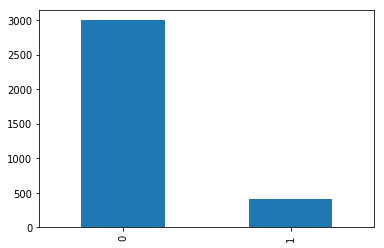

In [32]:
predictions_export['target'].value_counts().plot.bar()